# Show some basics and options for the retrieval
This notebooks reads a sample spectra and illustrates the retrieval from Barret et al. (2019) and some sensitivities for the particle properties

In [1]:
from PSDretrieval import processRadar as pR
from PSDretrieval import plotting as pl
from PSDretrieval import scattering as sc
import snowScatt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SpecWindow = pR.loadSpectra(loadSample=True) #load sample spectra (window of several heights and time steps)
SpecSingle  = pR.selectSingleTimeHeight(SpecWindow)

In [3]:
SpecSingle

<xarray.Dataset>
Dimensions:           (doppler: 250)
Coordinates:
    time              datetime64[ns] 2019-01-22T14:55:00
    range             float32 1.008e+03
  * doppler           (doppler) float64 -2.0 -1.99 -1.98 ... 0.47 0.48 0.49
Data variables:
    WSpecH            (doppler) float64 ...
    KaSpecH           (doppler) float64 ...
    XSpecH            (doppler) float64 ...
    pa                float32 ...
    XSpecHspecNoise   float32 ...
    KaSpecHspecNoise  float32 ...
    DWR_X_Ka          (doppler) float64 ...
    DWR_Ka_W          (doppler) float64 ...

### plot the sample spectrum

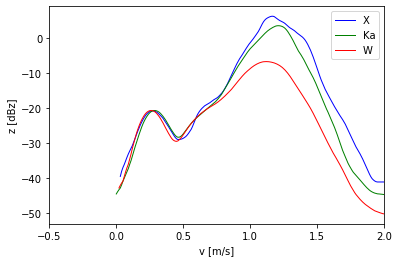

In [4]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax = pl.plotObsSpectra(SpecSingle,ax)

## 1. Calculate spectral DWR_Ka_W

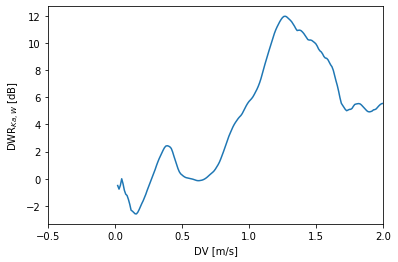

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax = pl.plotSpectralDWR(SpecSingle.DWR_Ka_W,ax)

## 2. Get Dmax from sDWR taking predefined scattering properties from snowScatt
### 2.1 get unambiguous DWR-Dmax

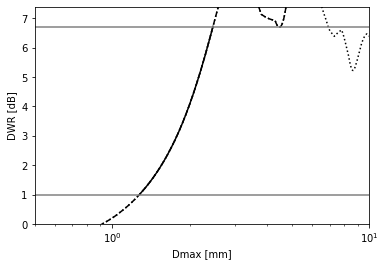

In [8]:
#snowScatt.snowLibrary.info() use this line to show available particle types
particleType = "vonTerzi_mixcoldend" #select a particle type
#particleType = "HW14" #select a particle type  

DWRxk,DWRkw,Dmax = sc.getDWRs(particleType) #get DWR(Dmax) relations from snowScatt

DmaxRetr = 5e-3 #[m] maximum size considered in retrieval; this inexplicitly assumes that larger particles are not relevant
DWRlowDetect = 1 #[dB] DWRs smaller than this are disregarded (detection limit)

fig,ax = plt.subplots(nrows=1,ncols=1)
DWRkwUnamb = sc.getUnambigousDWRdmax(Dmax,DWRkw,DmaxRetr=5e-3,DWRlowDetect=1,showIllus=True,ax=ax) #get Unambiguous

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

DmaxfromDWR = np.ones_like(SpecSingle.DWR_Ka_W.values)*np.nan
SpecSingle.DWR_Ka_W.values
for i,(DWRfromSpec,DV) in enumerate(zip(SpecSingle.DWR_Ka_W.values[::-1],SpecSingle.DWR_Ka_W.doppler[::-1])):
    idx = find_nearest(DWRkwMasked,DWRfromSpec)
    #print(-DV.values,Dmax[idx])
    DmaxfromDWR[i] = Dmax[idx]
    
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(-SpecSingle.DWR_Ka_W.doppler[::-1],DmaxfromDWR*1e3)
plt.ylabel("Dmax [mm]")
plt.ylabel("Dmax [mm]")